# How SVM works?

# 

See, here SVMs are *needed* to be **understood mathematically**. The example given in the book is so **simple** and it **doesn't even involve the kernel trick** at all!

And he (the guy who wrote the book) **removed the `B0`** (intercept) from the example saying "to make the tutorial simpler". Now, it was on me to search the stuff. When I searched, it looked much more **mathematically heavy** than I *expected*. Now, I am following the *book's example* as it is — and then if it sounds good to move ahead, I will try.

But for now, <br>
Let's get started **∞**

# 

In [1]:
# Regualr imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Getting the same example data
X1 = [2.327868056, 3.032830419, 4.485465382, 3.684815246, 
      2.283558563, 7.807521179, 6.132998136, 7.514829366,
      5.502385039, 7.432932365]
X2 = [2.458016525, 3.170770366, 3.696728111, 3.846846973,
      1.853215997, 3.290132136, 2.140563087, 2.107056961,
      1.404002608, 4.236232628]
y = [-1] * 5 + [1] * 5

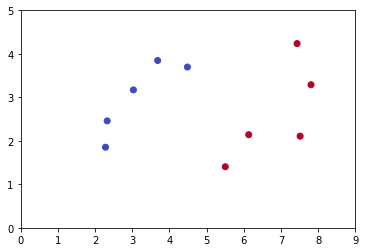

In [11]:
plt.scatter(X1, X2, c=y, cmap="coolwarm")
plt.ylim(0, 5)
plt.xlim(0, 9);

Now, let's recall our main formula for the threshold line...

#### A Line

# $$ \beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0 $$

Here, the author thinks that the problem *is easy* so we will remove the $ \beta_0 $ from the equation which means that the intercept will be removed and the **line will start from the (0, 0)** coordinates by default. We can add (which we have to) later.

For now, I am continuing the same as the book does.

###### 

#### An Updated Line

# $$ \beta_1 x_1 + \beta_2 x_2 = 0 $$

We will use the *sub-GD* method to find the parameters. So, let's start the coding.

The simple pseudo code:
1. **Initialize** the coefs
2. Make **prediction** with first instance
3. Get **"output"**
4. If output is **more than** 1 apply 1st formulae (means the data point is ***not*** capable to be a support vector)
5. If output is **less than** 1 apply 2nd formulae (means the data point ***is*** capable to be a support vector)
6. **Repeat** steps 2 to 5 for desired epochs
7. After that, our model will be **stable** and the output will be either greater than 0 or less than that.
8. Make **crisp prediction** if it is less than 0 then class 1 else class 0. (Or reverse)
9. Get accuracy.
10. We can also **track the accuray** on each epoch.

In [14]:
# Step 1. Initialization

B1 = 0.0
B2 = 0.0
Bi = np.array([B1, B2])

In [27]:
# Step 2. Make prediction
output = lambda X, y, Bi : y * (Bi * X).sum()

In [16]:
df = pd.DataFrame({"x1": X1, 
                   "x2": X2,
                   "y": y})
df

,x1,x2,y
0,2.327868,2.458017,-1
1,3.032830,3.170770,-1
2,4.485465,3.696728,-1
3,3.684815,3.846847,-1
4,2.283559,1.853216,-1
5,7.807521,3.290132,1
6,6.132998,2.140563,1
7,7.514829,2.107057,1
8,5.502385,1.404003,1
9,7.432932,4.236233,1


In [19]:
X = df[["x1", "x2"]].values
y = df["y"].values

In [28]:
# Step 3. Get output
output(X[0], y[0], Bi)

-0.0

Now, our output is `0.0` which is less than `1`. So we will use ↓

### $ \beta_i = \left(1 - \frac{1} {t}\right) \times \beta_i +  \frac {1} {\text{LearningRate} \times t} \times (y \times x) $

In [116]:
# Step 4. or 5. If less than or greater than 1

LearningRate = 0.45

def output_less_than_1(th, Bi, LearningRate, y, x):
    return ((1 - (1 / th)) * Bi + (1 / (LearningRate * th)) * (y * x))

In [117]:
Bi = output_less_than_1(1, Bi, LearningRate, y[0], X[0])
Bi

array([-5.17304012, -5.46225894])

Now, our updated B1 and B2 are ↑

In [118]:
# Step 6. Repeat 2 to 5
output(X[1], y[1], Bi)

33.00852224058554

The output is greater than 1 so we will use ↓

### $ \beta_i = \left(1 - \frac{1} {t}\right) \times \beta_i $

In [119]:
def output_greater_than_1(th, Bi, y, x):
    return (1 - (1 / th)) * Bi

In [120]:
Bi = output_greater_than_1(2, Bi, y[1], X[1])
Bi

array([-2.58652006, -2.73112947])

After 2nd iteration our updated B1 and B2 are ↑

###### —

Now, we will do this for 16 Epochs. <br>
*For the sake of simplicity, we will re-initialize the B1 and B2 and start from first iteration*

In [127]:
B1 = 0.0
B2 = 0.0
Bi = np.array([B1, B2])
LearningRate = 0.45

th = 1
for th_epoch in range(16):
    for th_row in range(len(X)):
        otpt = output(X[th_row], y[th_row], Bi)
        if otpt > 1:
            Bi = output_greater_than_1(th, Bi, y[th_row], X[th_row])
        else:
            Bi = output_less_than_1(th, Bi, LearningRate, y[th_row], X[th_row])
        th += 1

In [128]:
Bi

array([ 0.55239176, -0.72453359])

Amazing. The **thing to note here** is: 
> The `th` value is global. Which means if I am running first epoch and first row, then the th will be 1. Then after first epoch iterating over 10 rows, in the next epoch's first row the th will **not** be 1 again. It will be 11. That's how `th` is global.  

Now, after each epoch we can also check for the accuracy. But first let's discuss how to get accuracy and how to predict.

In [143]:
# Step 8. Make crisp prediction
def crisp(outputs):
    pred = []
    for output in outputs:
        if output < 0:
            pred.append(-1)
        else: pred.append(1)
    return pred

In [144]:
# Step 9. Predict and get accuracy
prediction = lambda Bi, X : (Bi * X).sum(1)
outputs = prediction(Bi, X)
outputs

array([-0.4950204 , -0.6220191 , -0.20066956, -0.75170826, -0.0812983 ,
        1.92899915,  1.8369078 ,  2.62449631,  2.02222513,  1.03659778])

In [145]:
crisp(outputs)

[-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]

## Amazing! 

# 

Now, let's give it a try to make it more flexible and able to worke on large dataset.

In [186]:
class SVM_out:
    """
    This class implement WITHOUT B0
    The final implementation will be later in this book.
    """
    
    def __init__(self, X, y, learning_rate=0.001, epochs=10, acc_per_epoch=False):
        self.X = np.array(X)
        self.y = np.array(y)
        if self.X.ndim != 2:
            raise NotImplementedError("The features must be 2D")
        if len(self.X) != len(self.y):
            raise NotImplementedError("Please! Come on!")
        self.Bi = np.array([0.0] * self.X.shape[1])
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        self.accuracies = []
        th_iteration = 1
        for th_epoch in range(self.epochs):
            for th_row in range(len(self.X)):
                otpt = self.output(th_row)
                if otpt > 1:
                    self.Bi = self.output_greater_than_1(th_iteration)
                else:
                    self.Bi = self.output_less_than_1(th_iteration, th_row)
                th_iteration += 1
            
            if acc_per_epoch:
                outputs = self.predict(self.X)
                acc = (self.y == self.crisp(outputs)).sum() / len(self.y)
                self.accuracies.append(acc)
    
    def output(self, th_row):
        return self.y[th_row] * (self.Bi * self.X[th_row]).sum()
    
    
    def output_less_than_1(self, th_iteration, th_row):
        return ((1 - (1 / th_iteration)) * self.Bi + (1 / (self.learning_rate * th_iteration)) * (self.y[th_row] * self.X[th_row]))
    
    
    def output_greater_than_1(self, th_iteration):
        return (1 - (1 / th_iteration)) * self.Bi
    
    
    def predict(self, X):
        return (self.Bi * X).sum(1)
    
    def crisp(self, outputs):
        pred = []
        for output in outputs:
            if output < 0:
                pred.append(-1)
            else: pred.append(1)
        return pred

In [175]:
model = SVM(X, y, learning_rate=0.45, epochs=16, acc_per_epoch=True)

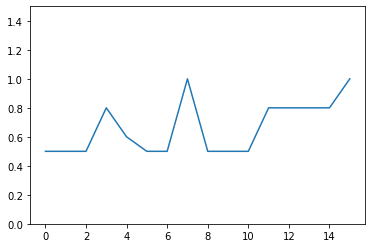

In [180]:
plt.plot(model.accuracies)
plt.ylim(0, 1.5);

In [185]:
class SVM_with:
    """
    This class implement WITH B0
    The final implementation will be later in this book.
    """
    
    def __init__(self, X, y, learning_rate=0.001, epochs=10, acc_per_epoch=False):
        self.X = np.array(X)
        self.y = np.array(y)
        if self.X.ndim != 2:
            raise NotImplementedError("The features must be 2D")
        if len(self.X) != len(self.y):
            raise NotImplementedError("Please! Come on!")
        self.Bi = np.array([0.0] * self.X.shape[1])
        self.B0 = 0.0
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        self.accuracies = []
        th_iteration = 1
        for th_epoch in range(self.epochs):
            for th_row in range(len(self.X)):
                otpt = self.output(th_row)
                if otpt > 1:
                    self.Bi = self.output_greater_than_1_Bi(th_iteration)
                    self.B0 = self.output_greater_than_1_B0(th_iteration)

                else:
                    self.Bi = self.output_less_than_1_Bi(th_iteration, th_row)
                    self.B0 = self.output_less_than_1_B0(th_iteration, th_row)
                th_iteration += 1
            
            if acc_per_epoch:
                outputs = self.predict(self.X)
                acc = (self.y == self.crisp(outputs)).sum() / len(self.y)
                self.accuracies.append(acc)
    
    def output(self, th_row):
        return self.y[th_row] * (self.Bi * self.X[th_row]).sum() + self.B0
    
    
    def output_less_than_1_Bi(self, th_iteration, th_row):
        return ((1 - (1 / th_iteration)) * self.Bi + (1 / (self.learning_rate * th_iteration)) * (self.y[th_row] * self.X[th_row]))
    
    
    def output_greater_than_1_Bi(self, th_iteration):
        return (1 - (1 / th_iteration)) * self.Bi
    
    
    def output_less_than_1_B0(self, th_iteration, th_row):
        return ((1 - (1 / th_iteration)) * self.B0 + (1 / (self.learning_rate * th_iteration)) * (self.y[th_row]))
    
    
    def output_greater_than_1_B0(self, th_iteration):
        return (1 - (1 / th_iteration)) * self.B0
    
    
    def predict(self, X):
        return self.B0 + (self.Bi * X).sum(1)
    
    def crisp(self, outputs):
        pred = []
        for output in outputs:
            if output < 0:
                pred.append(-1)
            else: pred.append(1)
        return pred

In [182]:
model = SVM(X, y, learning_rate=0.45, epochs=16, acc_per_epoch=True)

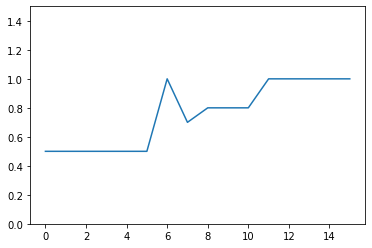

In [184]:
plt.plot(model.accuracies)
plt.ylim(0, 1.5);

In [187]:
import seaborn as sns

In [188]:
iris = sns.load_dataset("iris")

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

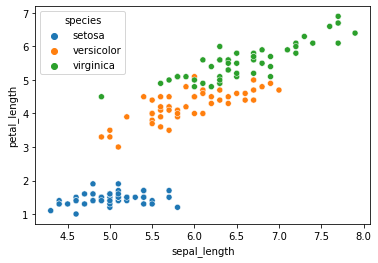

In [192]:
sns.scatterplot(x="sepal_length", y="petal_length", data=iris, hue=iris.species)

Now making it binary classification.

In [204]:
iris.iloc[iris[iris["species"] == "versicolor"].index, -1] = "virginica"

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

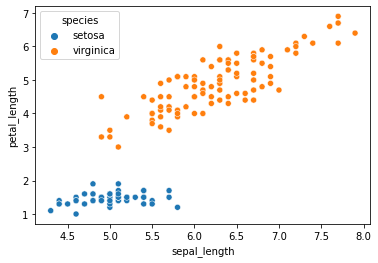

In [206]:
sns.scatterplot(x="sepal_length", y="petal_length", data=iris, hue=iris.species)

In [210]:
iris.species = iris.species.map({"setosa":-1, "virginica":1})

In [211]:
X = iris.drop("species", axis=1)
y = iris["species"]

In [214]:
model = SVM_out(X, y, epochs=100, acc_per_epoch=True)

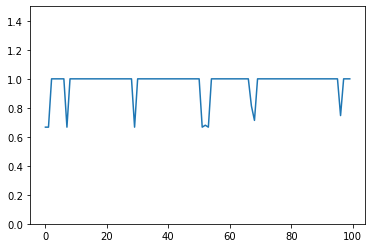

In [215]:
plt.plot(model.accuracies)
plt.ylim(0, 1.5);

In [216]:
model = SVM_with(X, y, epochs=100, acc_per_epoch=True)

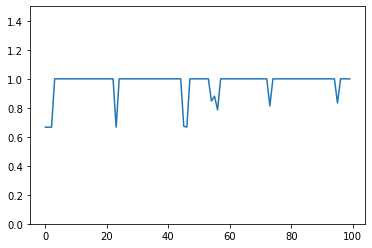

In [217]:
plt.plot(model.accuracies)
plt.ylim(0, 1.5);

In [218]:
model.B0

-0.19999999999999896

## One more try... 

In [252]:
from sklearn.datasets import make_blobs

In [300]:
X, y = make_blobs(n_features=2, centers=2, n_samples=1000, cluster_std=5)

In [301]:
y = np.where(y == 0, -1, 1)

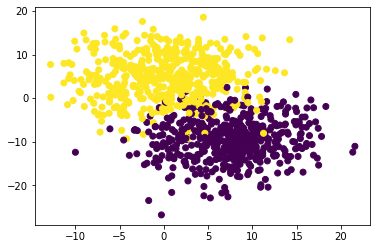

In [302]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [307]:
model = SVM_out(X, y, epochs=300, acc_per_epoch=True)

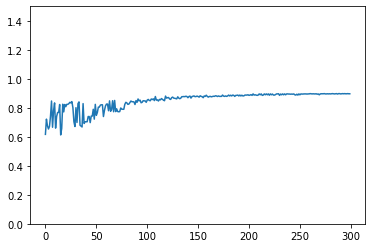

In [308]:
plt.plot(model.accuracies)
plt.ylim(0, 1.5);

In [311]:
model = SVM_with(X, y, epochs=300, acc_per_epoch=True)

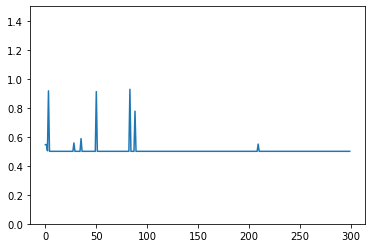

In [312]:
plt.plot(model.accuracies)
plt.ylim(0, 1.5);

This seems with B0, we are working poorly... but I don't know! Really I am not much satisfied with this SVM implementation. I want to implement `c` parameter, kernels and more... but this just feels like we are training a regression model with just classification!

Okay!

In [313]:
%%writefile SVM.py
import numpy as np

class SVM:
    """
    This class implement WITH B0
    
    How To
    ------
        # Prepare X and y
    >>> X = df[["x1", "x2"]]
    ... y = df["y"]
    
        # Train
    >>> model = SVM(X, y, learning_rate=0.5, acc_per_epoch=True)
    >>> model.accuracies

    """
    
    def __init__(self, X, y, learning_rate=0.001, epochs=10, acc_per_epoch=False):
        # Normal conversion
        self.X = np.array(X)
        self.y = np.array(y)
        
        # Usual Checking
        if self.X.ndim != 2:
            raise NotImplementedError("The features must be 2D")
        if len(self.X) != len(self.y):
            raise NotImplementedError("Please! Come on!")
            
        # Initialization of Betas
        self.Bi = np.array([0.0] * self.X.shape[1])
        self.B0 = 0.0
        
        # The learning rate and epoch setting
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        # This ↓ will contain the accuracies if it has to be
        # found with `acc_per_epoch=True`.
        self.accuracies = []
        
        # | keeps track of th iteration 
        # ↓ which will be passed in the formulae
        th_iteration = 1
        
        # For each th epoch
        for th_epoch in range(self.epochs):
            # for each individual row
            for th_row in range(len(self.X)):
                # first we will calculate the initial output
                otpt = self.output(th_row)
                # 2 different functions to update weights
                if otpt > 1:
                    self.Bi = self.output_greater_than_1_Bi(th_iteration) # for Bi
                    self.B0 = self.output_greater_than_1_B0(th_iteration) # for B0

                else:
                    self.Bi = self.output_less_than_1_Bi(th_iteration, th_row) # for Bi
                    self.B0 = self.output_less_than_1_B0(th_iteration, th_row) # for B0
                th_iteration += 1
            
            # If we are told to find the accuracies
            if acc_per_epoch:
                outputs = self.predict(self.X)
                acc = (self.y == self.crisp(outputs)).sum() / len(self.y)
                self.accuracies.append(acc)
    
    # Will return the value which then will be checked 
    def output(self, th_row):
        return self.y[th_row] * (self.Bi * self.X[th_row]).sum() + self.B0
    
    
    def output_less_than_1_Bi(self, th_iteration, th_row):
        return ((1 - (1 / th_iteration)) * self.Bi + (1 / (self.learning_rate * th_iteration)) * (self.y[th_row] * self.X[th_row]))
    
    
    def output_greater_than_1_Bi(self, th_iteration):
        return (1 - (1 / th_iteration)) * self.Bi
    
    
    def output_less_than_1_B0(self, th_iteration, th_row):
        return ((1 - (1 / th_iteration)) * self.B0 + (1 / (self.learning_rate * th_iteration)) * (self.y[th_row]))
    
    
    def output_greater_than_1_B0(self, th_iteration):
        return (1 - (1 / th_iteration)) * self.B0
    
    
    def predict(self, X):
        return self.B0 + (self.Bi * X).sum(1)
    
    def crisp(self, outputs):
        pred = []
        for output in outputs:
            if output < 0:
                pred.append(-1)
            else: pred.append(1)
        return pred

Writing SVM.py


# 

# Thanks!
Next up, we will look for the random forst!

# 